In [6]:
!pip install --upgrade pip
!pip install matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 8.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 10.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 8.8 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [seaborn]m7/8 [seaborn]ib]


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [9]:
# Charger les données dans un DataFrame (exemple fictif)
data = {'event': ['view', 'addtocart', 'view', 'transaction', 'view', 'addtocart', 'transaction']}
events = pd.DataFrame(data)

In [10]:
# Affichage des valeurs de chaque type d'événement
event_counts = events['event'].value_counts()
print(event_counts)

event
view           3
addtocart      2
transaction    2
Name: count, dtype: int64


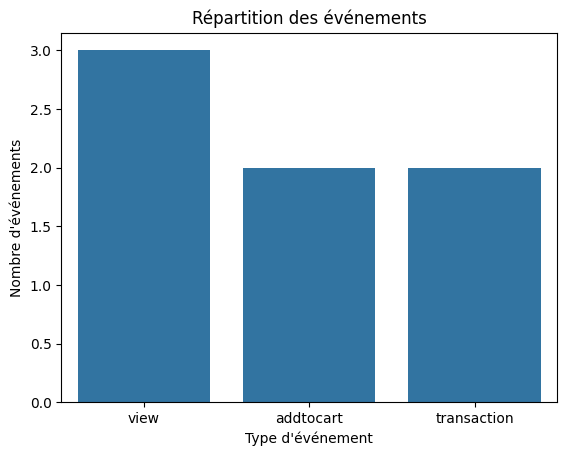

In [11]:
# Visualisation des événements sous forme de graphique en barres
sns.countplot(x='event', data=events)
plt.title("Répartition des événements")
plt.xlabel("Type d'événement")
plt.ylabel("Nombre d'événements")
plt.show()

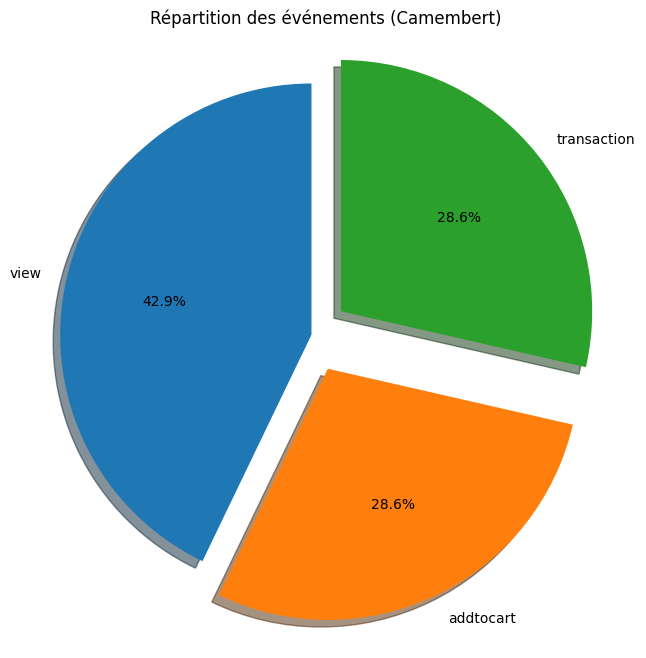

In [12]:
# Calcul des valeurs de 'event' pour créer un graphique circulaire
event_counts = events['event'].value_counts()
labels = event_counts.index
sizes = event_counts.values

# Explosion de la deuxième et troisième tranche pour mettre en évidence
explode = (0, 0.15, 0.15)  # Explose les tranches pour mettre en évidence

# Création d'une figure pour le graphique en camembert
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)


# Assurer un aspect circulaire
plt.axis('equal')

# Affichage du graphique
plt.title("Répartition des événements (Camembert)")
plt.show()

In [13]:
#Exercise 1

# Charger un jeu de données fictif
data = {
    'product_id': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'category': ['Electronics', 'Clothing', 'Electronics', 'Home', 'Clothing', 'Electronics', 'Home', 'Clothing', 'Electronics', 'Clothing'],
    'price': [150, 40, 200, 50, 30, 180, 60, 45, 220, 55],
    'quantity_sold': [30, 50, 25, 40, 60, 20, 35, 45, 15, 70],
    'date': pd.to_datetime(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04', '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08', '2025-01-09', '2025-01-10']),
    'region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West', 'North', 'South']
}

# Convertir en DataFrame
df = pd.DataFrame(data)

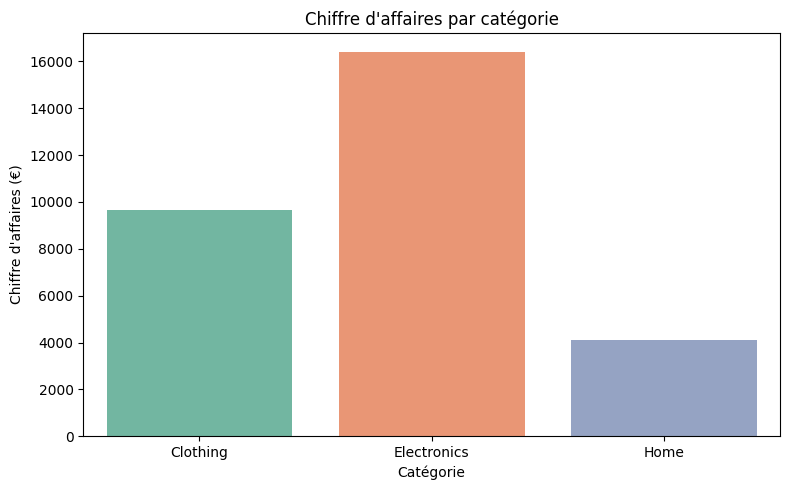

In [15]:
#Ventes totales par catégorie de produit - Cela te permet de voir quelles catégories génèrent le plus de revenus.

# Ajouter une colonne chiffre d'affaires (CA = prix * quantité)
df["revenue"] = df["price"] * df["quantity_sold"]

# Agrégation
revenue_by_category = df.groupby("category")["revenue"].sum().reset_index()

# Affichage
plt.figure(figsize=(8, 5))
sns.barplot(data=revenue_by_category, x="category", y="revenue", hue="category", palette="Set2", legend=False)
plt.title("Chiffre d'affaires par catégorie")
plt.ylabel("Chiffre d'affaires (€)")
plt.xlabel("Catégorie")
plt.tight_layout()
plt.show()


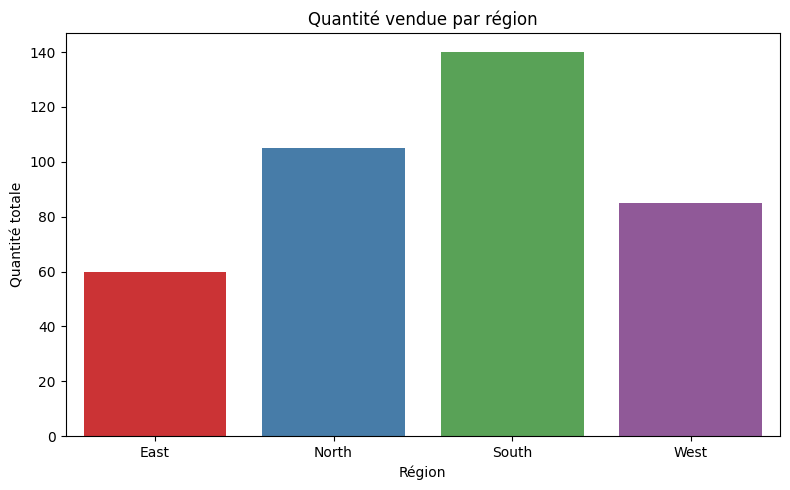

In [18]:
#Quantité vendue par région - Pour voir dans quelles régions les ventes sont les plus élevées.

quantity_by_region = df.groupby("region")["quantity_sold"].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=quantity_by_region, x="region", y="quantity_sold", hue="region", palette="Set1", legend=False)
plt.title("Quantité vendue par région")
plt.ylabel("Quantité totale")
plt.xlabel("Région")
plt.tight_layout()
plt.show()

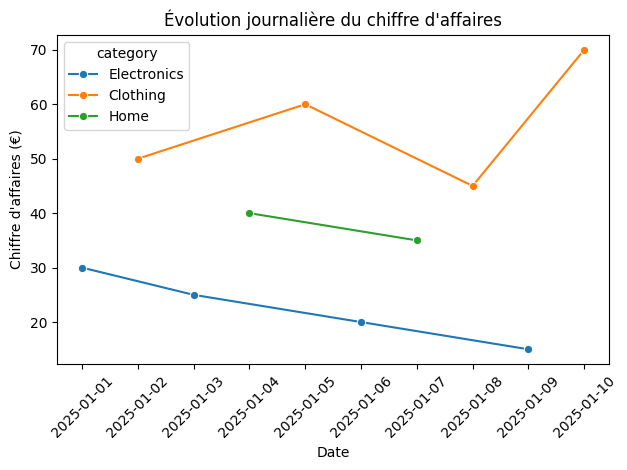

In [24]:
#Évolution journalière du chiffre d'affaires

sns.lineplot(x="date", y="quantity_sold", hue="category", data=df, marker="o")
plt.title("Évolution journalière du chiffre d'affaires")
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires (€)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

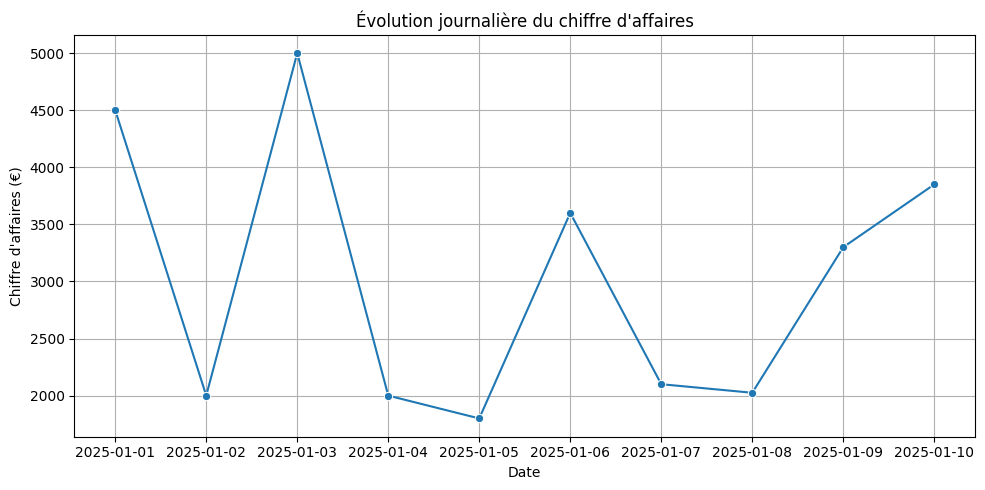

In [25]:
daily_revenue = df.groupby("date")["revenue"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_revenue, x="date", y="revenue", marker="o")
plt.title("Évolution journalière du chiffre d'affaires")
plt.ylabel("Chiffre d'affaires (€)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()
